# Trabajo: Detección de texturas

**Objetivos**

El objetivo de esta actividad es profundizar en la detección de texturas y en el uso de descriptores basados en entropía.

**Descripción**

Aunque existen numerosos tipos de descriptores de textura, en esta actividad nos centraremos únicamente en el uso de la entropía localizada, es decir, usando regiones de 3x3 y 5x5 píxeles y estudiaremos cómo de viable es esta técnica para la detección de texturas.

Para la realizacion de esta actividad he utilizado la libreria **skimage** la cual cuenta con herramientas automaticas para realizar el procesamiento de la imagen dada. 

In [10]:
#importaciones necesarias para el manejo de la imagen 

import matplotlib.pyplot as plt 

from skimage import data
from skimage.filters.rank import entropy #calcula la entropia dada
from skimage.util import img_as_ubyte
from skimage.morphology import rectangle #realiza el procesamiento por areas rectangulares
from skimage import io
from skimage.color import rgb2gray #aplanamos la imagen
import time # la utilizamos para calcular el tiempo de ejecucion de las funciones de entropia


Realizamos el cargue de la imagen 

In [4]:
image = rgb2gray(io.imread('C:/Archivos/tema5_actividad.png'))# con esta funcion aplanamos la imagen para que nos quede 2D
image.shape  #vemos el tamano de la imagen en este caso de 512px * 512px 


(512, 512)

Para ver la imagen vamos a crear una funcion que permite la visualizacion de la imagen, para ella nos hemos "inspirado" en el codigo dado en la clase magistral "Comenzando con el procesamiento de imagenes" de la materia percepcion computacional.

In [5]:
def imshow(img, texto, arg):
    fig, ax = plt.subplots(figsize=(5,5)) #tamano de la imagen
    if arg==0:
        imagen=ax.imshow(img, cmap=plt.cm.gray)  #Comando que muestra la imagen en escala de grises
    else:
        imagen=ax.imshow(img, cmap=plt.cm.jet)   #procesa la imagen en colores 
    ax.set_title(texto)
    ax.set_xticks([]), ax.set_yticks([])  #Evita que aparezcan los numeros de los ejes el cuadro de matplotlib
    fig.colorbar(imagen)
    plt.show()

    

Vamos a ver la imagen que hemos cargado

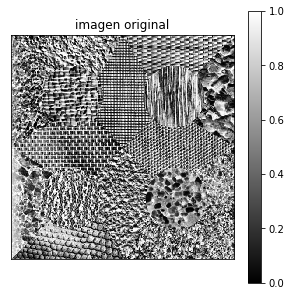

In [6]:
imshow(image,'imagen original', 0)  #Muestra la imagen que hemos cargado previamente

### Calculando la Entropia

Ahora vamos a calcular la entropia con la funcion entropy de la libreria skimage y veamos la matriz de valores de entropia calculados que genera. Adicionalmente podemos ver el tiempo de ejecucion en segundos en segundos: 

In [16]:
start = time.time()  #calculo de tiempo inicial
imagenEntropia3x3 = entropy(image, rectangle(3,3))
end = time.time() #calculo de tiempo final
tiempo1 = end - start #tiempo total de ejecucion en segundos. 
print('Tiempo de ejecucion en segundos: ', tiempo1)




Tiempo de ejecucion en segundos:  0.15956997871398926


C:\Users\dicue\Anaconda3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


### Veamos la imagen con su entropia calculada en un area 3 * 3 : 

Vemos que el calculo de la entropia en un rectangulo 3*3 arroja valores no muy claros donde aun no es posible distingir texturas en la imagen: 

Vemos que nuestra imagen muestra en 3*3 mucha entropia donde no son facilmente distingibles las texturas

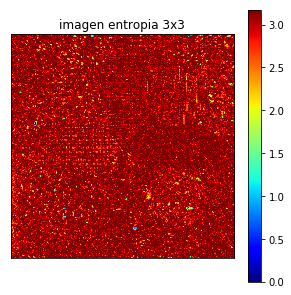

In [8]:
imshow(imagenEntropia3x3,'imagen entropia 3x3',1) #veamos como se ve nuestra el calculo de entropia en 3*3

### Veamos la imagen con su entropia calculada en un area 5 * 5 : 

Vemos que el calculo de la entropia en un rectangulo  5*5 

In [17]:
start = time.time()
imagenEntropia5x5 = entropy(image, rectangle(5,5))
end = time.time()
tiempo2 = end - start
print('Tiempo de ejecucion en segundos: ', tiempo2)

C:\Users\dicue\Anaconda3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Tiempo de ejecucion en segundos:  0.2409534454345703


**Conclusion:**

Vemos que nuestra imagen muestra aun existe mucha entropia pero ya es mas facilmente distingibles algunas texturas y formas

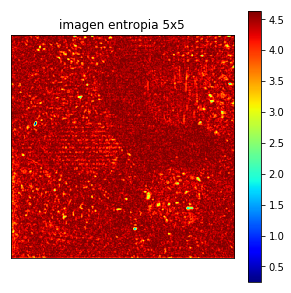

In [178]:
imshow(imagenEntropia5x5,'imagen entropia 5x5',1)  #vamos a ver como se ve nuestra imagen en calculo de 5*5 

### Veamos la imagen con su entropia calculada en un area 7 * 7 : 

Vemos que el calculo de la entropia en un rectangulo  7*7 

C:\Users\dicue\Anaconda3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Tiempo de ejecucion en segundos:  0.3350710868835449


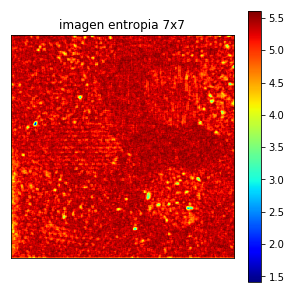

In [18]:
start = time.time()
imagenEntropia7x7 = entropy(image, rectangle(7,7))
end = time.time()
tiempo3 = end - start
print('Tiempo de ejecucion en segundos: ', tiempo3)
imshow(imagenEntropia7x7,'imagen entropia 7x7',1)  

**Conclusion:**

Vemos que nuestra imagen muestra aun existe mucha entropia pero ya es mas facilmente distingibles algunas texturas y formas en la imagen dada cada vez se va aclarando mas. donde ya son distinguibles algunas formas circulares y otros patrones:

### Comparativa de las tres imagenes

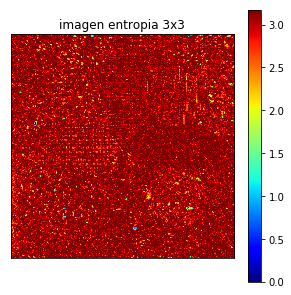

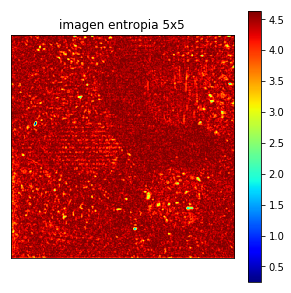

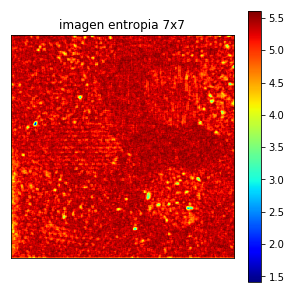

In [181]:
imshow(imagenEntropia3x3,'imagen entropia 3x3',1)
imshow(imagenEntropia5x5,'imagen entropia 5x5',1) 
imshow(imagenEntropia7x7,'imagen entropia 7x7',1) 

Y que pasa si aumentamos, aun mas el cuadro de calculo de la entropia??

**Respuesta**

Entre mas aumentamos el rectangulo de calculo de la entropia esta disminuye y tampoco es posible distinguir texturas y patrones claramente en la imagen dada: 

C:\Users\dicue\Anaconda3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Tiempo de ejecucion en segundos:  0.578453540802002


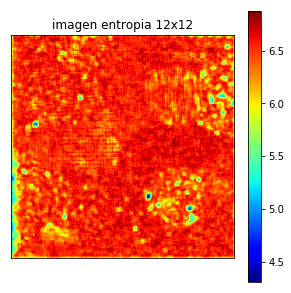

In [27]:
start = time.time()
imagenEntropia12x12 = entropy(image, rectangle(12,12))
end = time.time()
tiempo4 = end - start
print('Tiempo de ejecucion en segundos: ', tiempo4)
imshow(imagenEntropia12x12,'imagen entropia 12x12',1) 

### Comparativa en tiempos de ejecucion: 

Veamos la comparativa en tiempos de ejecucion del calculo de las entropias en los diferentes rectangulos:

In [28]:
print('Tiempo 3x3: ', tiempo1,
      '\nTiempo 5x5: ', tiempo2, 
      '\nTiempo 7x7: ', tiempo3,
      '\nTiempo 12x12: ', tiempo4)

Tiempo 3x3:  0.15956997871398926 
Tiempo 5x5:  0.2409534454345703 
Tiempo 7x7:  0.3350710868835449 
Tiempo 12x12:  0.578453540802002


Vemos que los tiempos de ejecucion van aumentando a medida que aumentamos el rectangulo de calculo de entropia.